# SVM(허민석책 실습)

---

## 주요용어
* SVM
* 서포트벡터
* 마진
* 결정 경계
* 비용(C, Cost)

---

## 알고리즘

* `SVM`은 `서포트 벡터 머신(Support Vector Machine)`을 줄여서 쓴 말이다.
결정경계에 따라 데이터를 분류하는 알고리즘이다.

* `서포트 벡터`는 결정경계를 찾기 위해 활용되는 개념인데 여기서 `벡터`는 데이터의 좌표(데이터 포인트)를 의미한다.  
`서포트벡터`는 결정경계선과 가장 가까이 맞닿은 벡터(데이터 포인트)를 의미한다.

* `마진` : 서포트벡터와경계 사이의 거리를 `마진(margin)`이라고 한다. `마진`을 최대로 하는 경계를 찾는것이 `SVM알고리즘`의 목표라고 할수 있다.

* `비용(cost)` 비용이ㅣ 낮을수록 마진을 높이고, 학습에러율을 증가시키는 방향으로 결정경게선을 만든다.
    과소적합/과대적합이 되지 않도록 적절한 비용값을 정하는것이 중요하다.
    
* `결정경계`는 벡터 공간이 N차원일때, N-1차원이다.(고려하는 특성의 개수와 관련)  
    데이터가 3차원이라면 2차원으로 나타나기 때문에 결정경계를 `초평면`이라고 하기도한다.

* `맵핑 함수` 저차원에서 고차원으로 옮겨주는 함수
* `커널 트릭(kernel trick)` 은 고차원으로데이터를 실제로 보내지 않고 유사한 효과를 줘서 결정경계를 빠르게 찾는방법이다.

* SVM의 방식은 `선형 SVM`과 `커널트릭`을 사용한 방법으로 나눌수 있다.  
    여기서 쓰는 것은 RBF커널이라고 한다.

* 함수의 표준편차를 조정하면 결정경계의 곡률이 조절되는데, 이때 조정하는 변수를 `감마`라고 한다.  
    `감마`가 커질수록 표준편차가 작아지고, 결정경계가 구부러진다.

* 본 svm실습에서는 두가지 파라메터를 조절하는데, 바로 `비용(cost)`과 `감마(gamma)`이다.

## 사이킷 런

* SVM모델을 불러오는데에 `from sklearn.svm import SVC`를 쓴다.
* `Grid Search CV` : 최적의 파라메터를 찾는데 사용된다.
* `fit`은 이전과 마찬가지로 훈련에 사용된다.(최적의 파라메터를 찾아서 모델에 적용시키는 과정)
* `predict`는 예측하는데 쓴다. 실제값과 예측값을 별도의 리턴값으로 반환한다(2개의 반환값)
* `classification_report` : 분류 성능평가? predict로 얻은 값으로 얻을수있다.
* `accuracy_score(y_true, y_pred)`는 최종으로 예측한 값의 검증에 사용된다?(정확도를 수치로 출력)





---

## <1> 데이터불러오기
> csv파일에서 데이터를 불러온다.
> pickle이란걸 쓴다.

## <2> 최적의 파라메터 찾기
> SVM모델에 필요한 두 파라메터 cost, gamma에 대해서, 최적의 값을 찾는다.
> svm_parameters라는 딕셔너리형 데이터에 gamma와 c로 고려하는 값을 담아 놓고, GridSearchCV()f라는 함수를 실행하면 best_params_ 변수에 최적의 값이 저장되어 확인할 수 있다.

## <3> 시각화
>넘파이의 meshgrid로 차트를 그리는데...

## <4> 테스트 : 예측하기, 예측결과에 대해 정확도를 계산
> 테스트에 사용될 특징과, 예측할 값 (농구선수 포지션)을 지정합니다

---


## 사용하는 라이브러리

### 사이킷 런
* sklearn.`model_selection`에 있는 `GridSearchCV`
* sklearn.`metrics`에 있는 `classification_report`
* sklearn.`metrics`에 있는 `accuracy_score`
* sklearn.`svm`에 있는 `SVC`

### 그 외
* 넘파이
* 판다스
* pickle(데이터 로딩에 사용)
* pyplot
* seaboran


In [18]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#데이터 불러오기
#학습데이터
with open('heo-data/pkl/basketball_train.pkl', 'rb') as train_data: 
    train = pickle.load(train_data)

#검증데이터
with open('heo-data/pkl/basketball_test.pkl', 'rb') as test_data: 
    test = pickle.load(test_data)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

[GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

>* 1번째 파라메터인 `SVC()` : 최적조건을 확인하고자 하는 함수. 
>* 2번째 파라메터인 `svm_parameters`는 위의 함수에 입력할 인자를 딕셔너리(list도 가능함) 타입으로 입력.   
    SVC(C=C, gamma=gamma)와 같이 C, gamma를 변인으로 해서 최적 조건을 확인하고자 하는것이다.  
>* `cv=10`는 k-fold 교차검증 횟수를 나타내는 숫자이다.  

In [21]:
#함수 선언.
def svc_param_selection(X, y, nfolds):
    #SVM의 파라메터
    svm_parameters = [
        {
            'kernel' : ['rbf'],
            'gamma' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
            'C': [0.01, 0.1, 1, 10, 100, 1000]
        }
    ]
    
    # GridSearchCV 를 이용해서 최적의 파라메터 찾기
    # 개발자가 부여한 비용과 감마 후보들을 모두 조합해서 최적의 파라메터(비용, 감마)를 구한다.
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10, iid=True)
    
    
    # values.ravel()은 데이터를 1열로 나열해서 일차원데이터로 만들어 줍니다
    clf.fit(X_train, y_train.values.ravel())
    
    #print(clf.best_params_)
    
    return clf

In [22]:
#훈련 하고자 하는 데이터. 
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

# 최적의 파라미터를 sklearn의 gridsearch를 통해 구합니다. svc_param_selection
# values.ravel()은 데이터를 1열로 나열해서 일차원데이터로 만들어 줍니다
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

print( '여기서 최적화된 데이터는?')
print( clf.best_params_)
print( ' C(Cost) : ', clf.best_params_['C'] )
print( ' gamma : ', clf.best_params_['gamma'] )
print( ' kernel : ', clf.best_params_['kernel'] )

여기서 최적화된 데이터는?
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
 C(Cost) :  0.1
 gamma :  1
 kernel :  rbf


* `svc_param_selection()` 은 바로 위에서 정의한 함수이다. `GridSearchCV( ..)` 가 `C`, `gamma`값이 최적이 되는 때의 값을 반환한다.  
최적의 값은 `GridSearchCV( ..).best_params_`에 딕셔너리 형으로 저장되어 있다.

# 시각화
다음부터는, C와 gamma값이 정해짐에 따라 결정 경계선을 비교해볼 것입니다.  
최적의 파라미터일 때의 결정경계선과, 다른 파라미터들일 때의 결정경계선을 비교해봅니다.

C_canditates라는 리스트, gamma_candidates라는 리스트를 만들어놓고


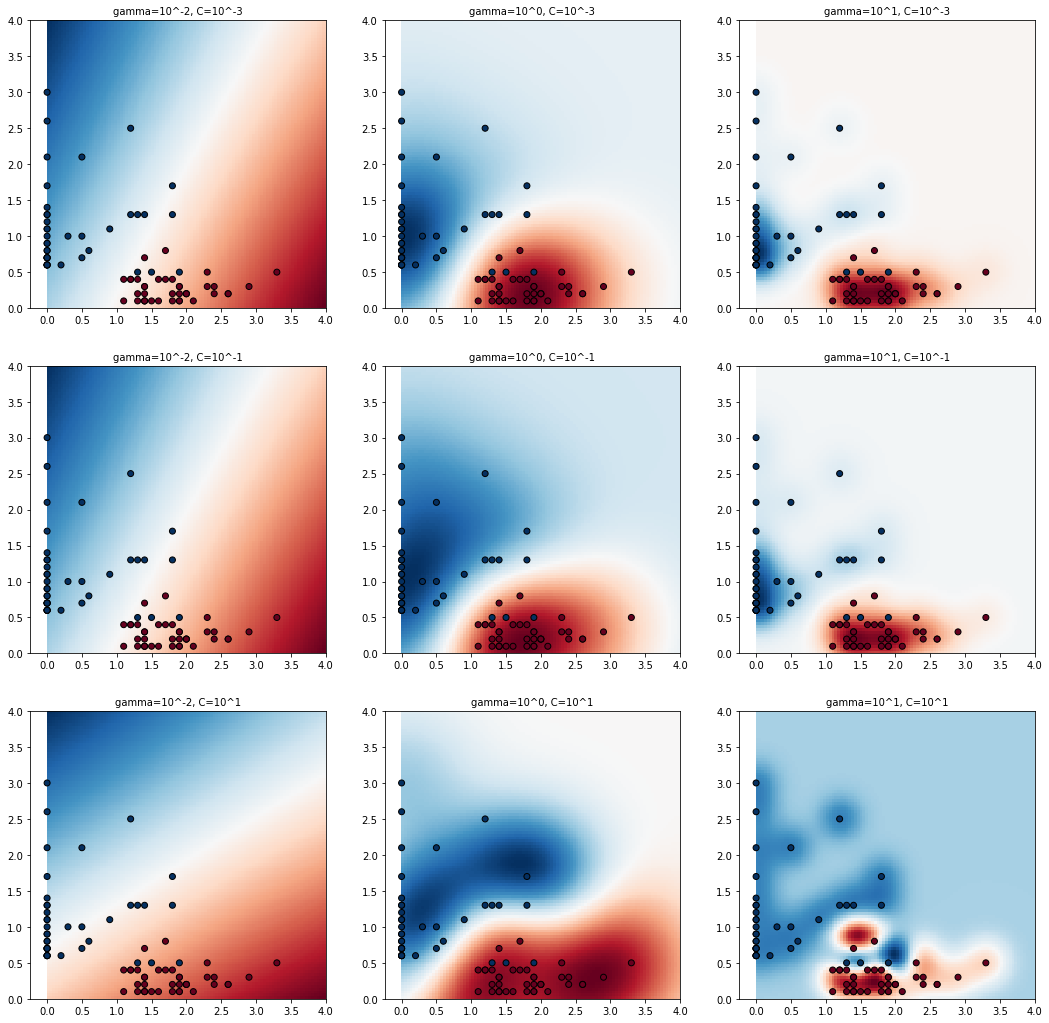

In [23]:
# 시각화를 하기 위해, 최적의 C와 최적의 C를 비교하기 위한 다른 C를 후보로 저장합니다.
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화를 하기 위해, 최적의 gamma와 최적의 gamma를 비교하기 위한 다른 gamma를 후보로 저장합니다.
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 10)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 포지션에 해당하는 문자열 SG와 C를 벡터화합니다.
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장합니다.
classifiers = []
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 18,18 사이즈의 챠트를 구성합니다.
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화합니다.
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화해봅니다.
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # 서포트 벡터와 결정경계선을 시각화합니다.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

# 테스트
위의 grid search를 통해 얻은 C, Gamma를 사용해서 모델을 테스트해본다.
X_test, Y_test를 문자열의 리스트로 만들고, 

In [29]:
# 테스트에 사용될 특징을 지정합니다
X_test = test[['3P', 'BLK']]


# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_test = test[['Pos']]



# 최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여, 실제값과 예측값을 얻습니다.
# 구조 분해 할당? 
# y_true, y_pred =  y_test, clf.predict(X_test)

y_true = y_test
y_pred = clf.predict(X_test)


print('classification_report : ')
print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

classification_report : 
              precision    recall  f1-score   support

           C       0.82      1.00      0.90         9
          SG       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20


accuracy : 0.9


In [25]:
import numpy as np

# 부록
## numpy.ravel()

```
`ravel()`은 2차원의 데이터를 1열로 나열해서 일차원 데이터로 만들어주는 역할을 한다.  
입력하는 파라메터는 array 형태의 데이터이고, 같은 타입의 1차원 데이터가 반환된다. 
```

`numpy.ravel(a, order)`


**입력**  
`a` : array-like (packed as 1-D array)  
`order` : C, F, A, K 을 쓰면 해당 스타일로 정렬된다. 


**출력**  
`y` : array-like ( 1-D ndarray )  


아래의 코드는 `ravel()`의 가장 기본적인 사용 예시이다.  

In [30]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

### order style 바꿔보기
C, F, A, K를

In [47]:
#order style 바꿔보기
x = np.array([
        [1, 2, 3], 
        [4, 5, 6],
        [7, 8, 9]
    ])
print(x, '\n')
print(x, '\n')
print('numpy.ravel()')
print(x, '\n')


#'C' 스타일 (기본값) ravel
print('C style ravel()로 정렬한 상태')
print(np.ravel(x, 'C'), '\n')


# 'F'스타일 ravel
print('F style ravel()로 정렬한 상태')
print(np.ravel(x, 'F'))

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

numpy.ravel()
[[1 2 3]
 [4 5 6]
 [7 8 9]] 

C style ravel()로 정렬한 상태
[1 2 3 4 5 6 7 8 9] 

F style ravel()로 정렬한 상태
[1 4 7 2 5 8 3 6 9]
